# 0. 시작하기 전에

### 구글 드라이브 연동

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 기본 경로 설정

In [ ]:
import os
os.chdir('/content/drive/MyDrive/프로젝트/캐글/자전거 대여 수요 예측/data/')

In [ ]:
!pwd

/content/drive/MyDrive/프로젝트/캐글/자전거 대여 수요 예측/data


### 패키지 임포트

In [ ]:
import numpy as np      # 넘파이
import pandas as pd     # 판다스
import matplotlib.pyplot as plt     # 맷플롯립
import seaborn as sns       # 시본
import matplotlib.gridspec as gridspec  # 한 번에 여러 그래프를 출력시켜주는 라이브러리
%matplotlib inline

### 전체 컬럼, 로우 다 보이게 설정

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# 1. 탐색적 데이터 분석 (EDA : Exploratory Data Analysis)



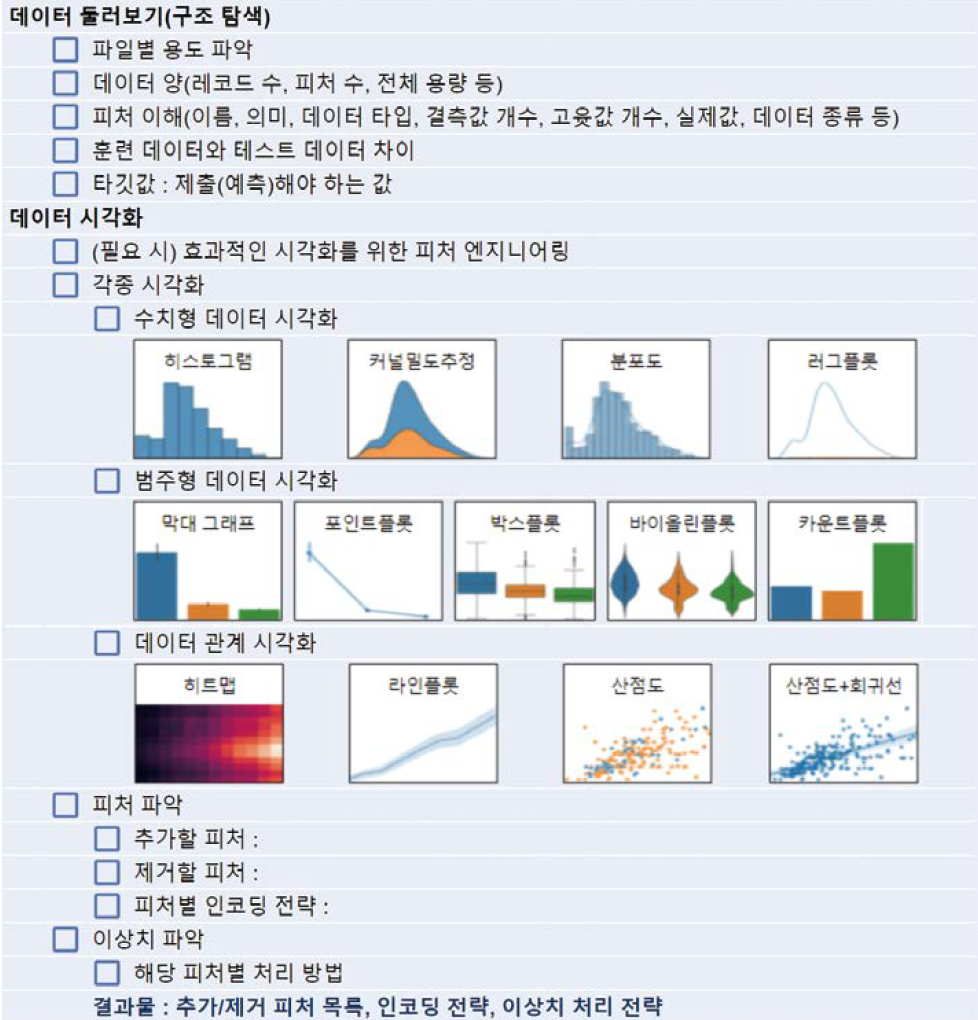

In [ ]:
train = pd.read_csv('train.csv')   # train.csv 불러오기
test = pd.read_csv('test.csv')   # test.csv 불러오기
submission = pd.read_csv("sampleSubmission.csv")

### 각 데이터 확인

In [ ]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
train.shape

(10886, 12)

In [ ]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [ ]:
test.shape

(6493, 9)

In [ ]:
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [ ]:
submission.shape

(6493, 2)

### train 변수 이름 설명




1.   datetime : 1시간 간격 기록 일시
2.   season : 계절
3. holiday : 공휴일 여부 (0:공휴일 아님, 1: 공휴일)
4. workingday : 근무일 여부(0:근무일 아님, 1: 근무일)
5. weather : 날씨(숫자가 클수록 날씨가 안 좋음)
6. temp : 실제온도
7. atemp : 체감 온도
8. humidity : 상대 습도
9. windspeed : 풍속
10. casual : 비회원 사용자 수
11. registered : 회원 사용자 수
12. count : 자전거 대여 수량




### 칼럼 정보 확인

In [ ]:
train.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


### 칼럼 통계치 확인

In [ ]:
round(train.describe(), 2)   # 통계치를 소숫점 둘째 자리까지 반올림하여 출

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.00,10886.00,10886.00,10886.00,10886.00,10886.00,10886.00,10886.00,10886.00,10886.00,10886.00
mean,2.51,0.03,0.68,1.42,20.23,23.66,61.89,12.80,36.02,155.55,191.57
std,1.12,0.17,0.47,0.63,7.79,8.47,19.25,8.16,49.96,151.04,181.14
min,1.00,0.00,0.00,1.00,0.82,0.76,0.00,0.00,0.00,0.00,1.00
25%,2.00,0.00,0.00,1.00,13.94,16.66,47.00,7.00,4.00,36.00,42.00
50%,3.00,0.00,1.00,1.00,20.50,24.24,62.00,13.00,17.00,118.00,145.00
75%,4.00,0.00,1.00,2.00,26.24,31.06,77.00,17.00,49.00,222.00,284.00
max,4.00,1.00,1.00,4.00,41.00,45.46,100.00,57.00,367.00,886.00,977.00


### 결측값 개수 확인

In [ ]:
pd.set_option('display.max_rows', None)
train.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

### 결측값이 아닌 빈 문자열이 있는지 확인

In [ ]:
def is_emptystring(x):
    return x.eq('').any()

train.apply(lambda x : is_emptystring(x))

datetime      False
season        False
holiday       False
workingday    False
weather       False
temp          False
atemp         False
humidity      False
windspeed     False
casual        False
registered    False
count         False
dtype: bool

### 일부 데이터 피처 엔지니어링

연도, 월, 일, 시간, 분, 초 피처 추가

In [ ]:
# 날짜 피처 생성
train['date'] = train['datetime'].apply(lambda x : x.split()[0])

# 연도,월 , 일, 시간 차례로 추가
train['year'] = train['datetime'].apply(lambda x : x.split()[0].split('-')[0])
train['month'] = train['datetime'].apply(lambda x : x.split()[0].split('-')[1])
train['day'] = train['datetime'].apply(lambda x : x.split()[0].split('-')[2])
train['hour'] = train['datetime'].apply(lambda x : x.split()[1].split(':')[0])

In [ ]:
from datetime import datetime
import calendar
# 요일 피처 추가
train['weekday'] = train['date'].apply(lambda dateString: calendar.day_name[datetime.strptime(dateString, '%Y-%m-%d').weekday()])

In [ ]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,hour,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,2011,01,01,00,Saturday
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,2011,01,01,01,Saturday
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,2011,01,01,02,Saturday
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,2011,01,01,03,Saturday
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,2011,01,01,04,Saturday


### 데이터 시각화

분포도 그리기

<Figure size 100x100 with 0 Axes>

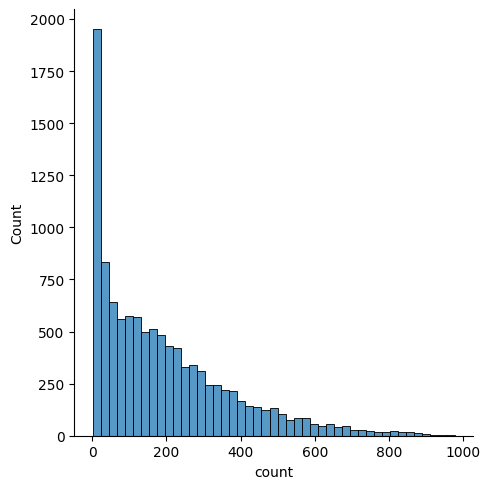

In [ ]:
plt.figure(figsize=(1,1))

sns.displot(train['count'])

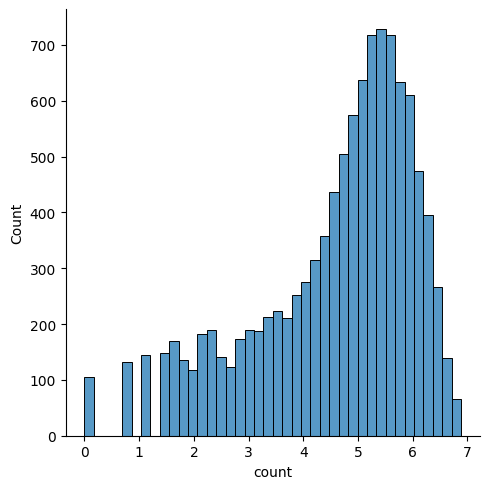

In [ ]:
sns.displot(np.log(train['count']))

막대그래프 시각화

<ipython-input-22-61a87c388347>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='year', y='count', data = train, ax=axes[0,0], palette = palette)
<ipython-input-22-61a87c388347>:4: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.barplot(x='year', y='count', data = train, ax=axes[0,0], palette = palette)
<ipython-input-22-61a87c388347>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='month', y='count', data = train, ax=axes[0,1], palette = palette)
<ipython-input-22-61a87c388347>:5: UserWarning: 
The palette list has fewer values (10) than needed (12) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x='month'

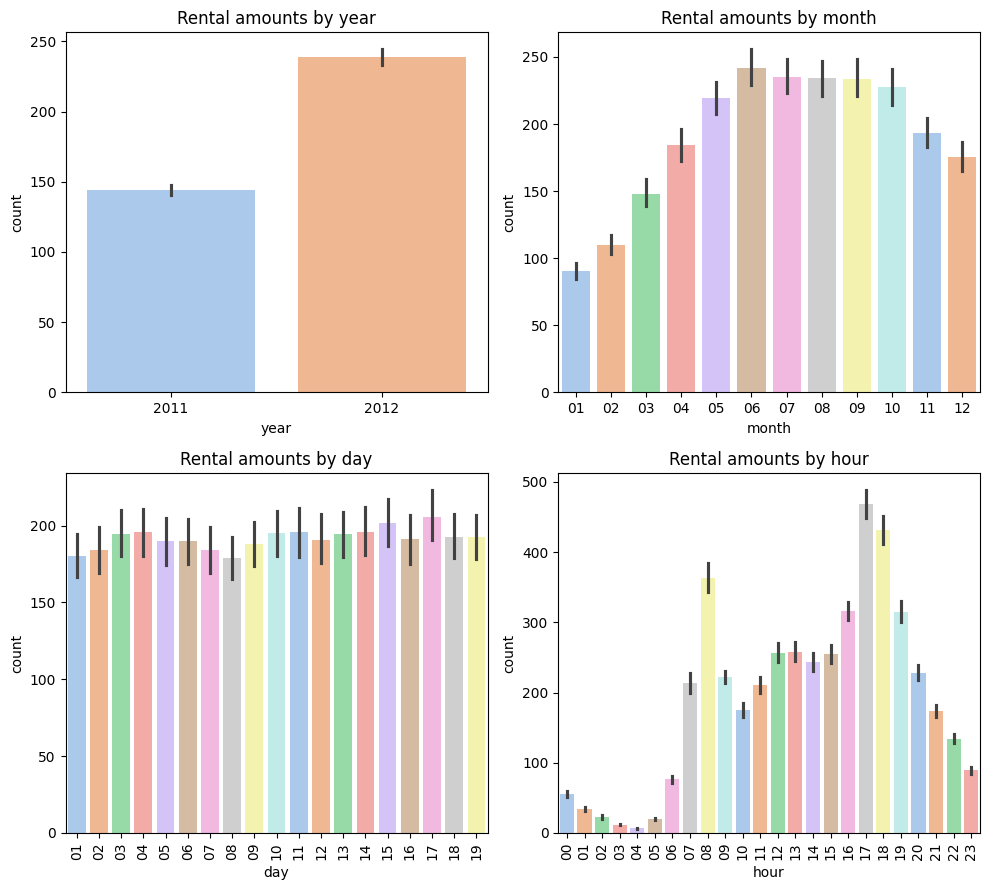

In [ ]:
figure, axes = plt.subplots(nrows=2, ncols=2,figsize=(10,9))
palette = sns.color_palette("pastel")

sns.barplot(x='year', y='count', data = train, ax=axes[0,0], palette = palette)
sns.barplot(x='month', y='count', data = train, ax=axes[0,1], palette = palette)
sns.barplot(x='day', y='count', data = train, ax=axes[1,0], palette = palette)
sns.barplot(x='hour', y='count', data = train, ax=axes[1,1], palette = palette)

axes[0,0].set(title = 'Rental amounts by year')
axes[0,1].set(title = 'Rental amounts by month')
axes[1,0].set(title = 'Rental amounts by day')
axes[1,1].set(title = 'Rental amounts by hour')

axes[1,0].tick_params(axis='x', labelrotation=90)
axes[1,1].tick_params(axis='x', labelrotation=90)

plt.tight_layout()
plt.show()

박스플롯 시각화

<ipython-input-23-c56e6c9e4b88>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='season', y='count', data = train, ax=axes[0,0], palette = palette)
<ipython-input-23-c56e6c9e4b88>:4: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.boxplot(x='season', y='count', data = train, ax=axes[0,0], palette = palette)
<ipython-input-23-c56e6c9e4b88>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='weather', y='count', data = train, ax=axes[0,1], palette = palette)
<ipython-input-23-c56e6c9e4b88>:5: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.boxplot(x='weather', y='count', data = train,

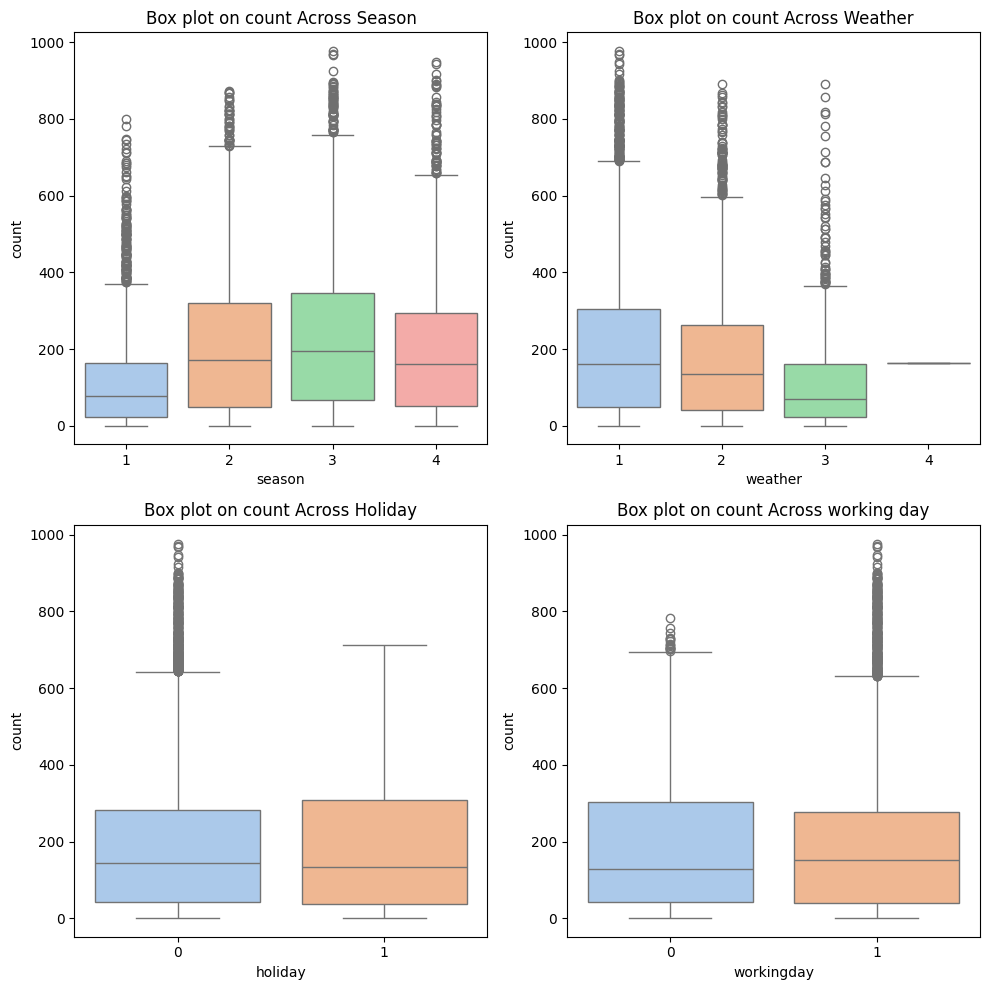

In [ ]:
figure, axes = plt.subplots(nrows=2, ncols=2,figsize=(10,10))
palette = sns.color_palette("pastel")

sns.boxplot(x='season', y='count', data = train, ax=axes[0,0], palette = palette)
sns.boxplot(x='weather', y='count', data = train, ax=axes[0,1], palette = palette)
sns.boxplot(x='holiday', y='count', data = train, ax=axes[1,0], palette = palette)
sns.boxplot(x='workingday', y='count', data = train, ax=axes[1,1], palette = palette)

axes[0,0].set(title = 'Box plot on count Across Season')
axes[0,1].set(title = 'Box plot on count Across Weather')
axes[1,0].set(title = 'Box plot on count Across Holiday')
axes[1,1].set(title = 'Box plot on count Across working day')

plt.tight_layout()
plt.show()

포인트플롯 시각화

<ipython-input-24-50d4fd6f392d>:4: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.pointplot(x='hour', y='count', data = train, hue='workingday',ax=axes[0], palette = palette)
<ipython-input-24-50d4fd6f392d>:5: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.pointplot(x='hour', y='count', data = train, hue='holiday',ax=axes[1], palette = palette)
<ipython-input-24-50d4fd6f392d>:6: UserWarning: The palette list has more values (10) than needed (7), which may not be intended.
  sns.pointplot(x='hour', y='count', data = train, hue='weekday',ax=axes[2], palette = palette)
<ipython-input-24-50d4fd6f392d>:7: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.pointplot(x='hour', y='count', data = train, hue='season',ax=axes[3], palette = palette)
<ipython-input-24-50d4fd6f392d>:8: UserWarning: The palette list has more values (10) than nee

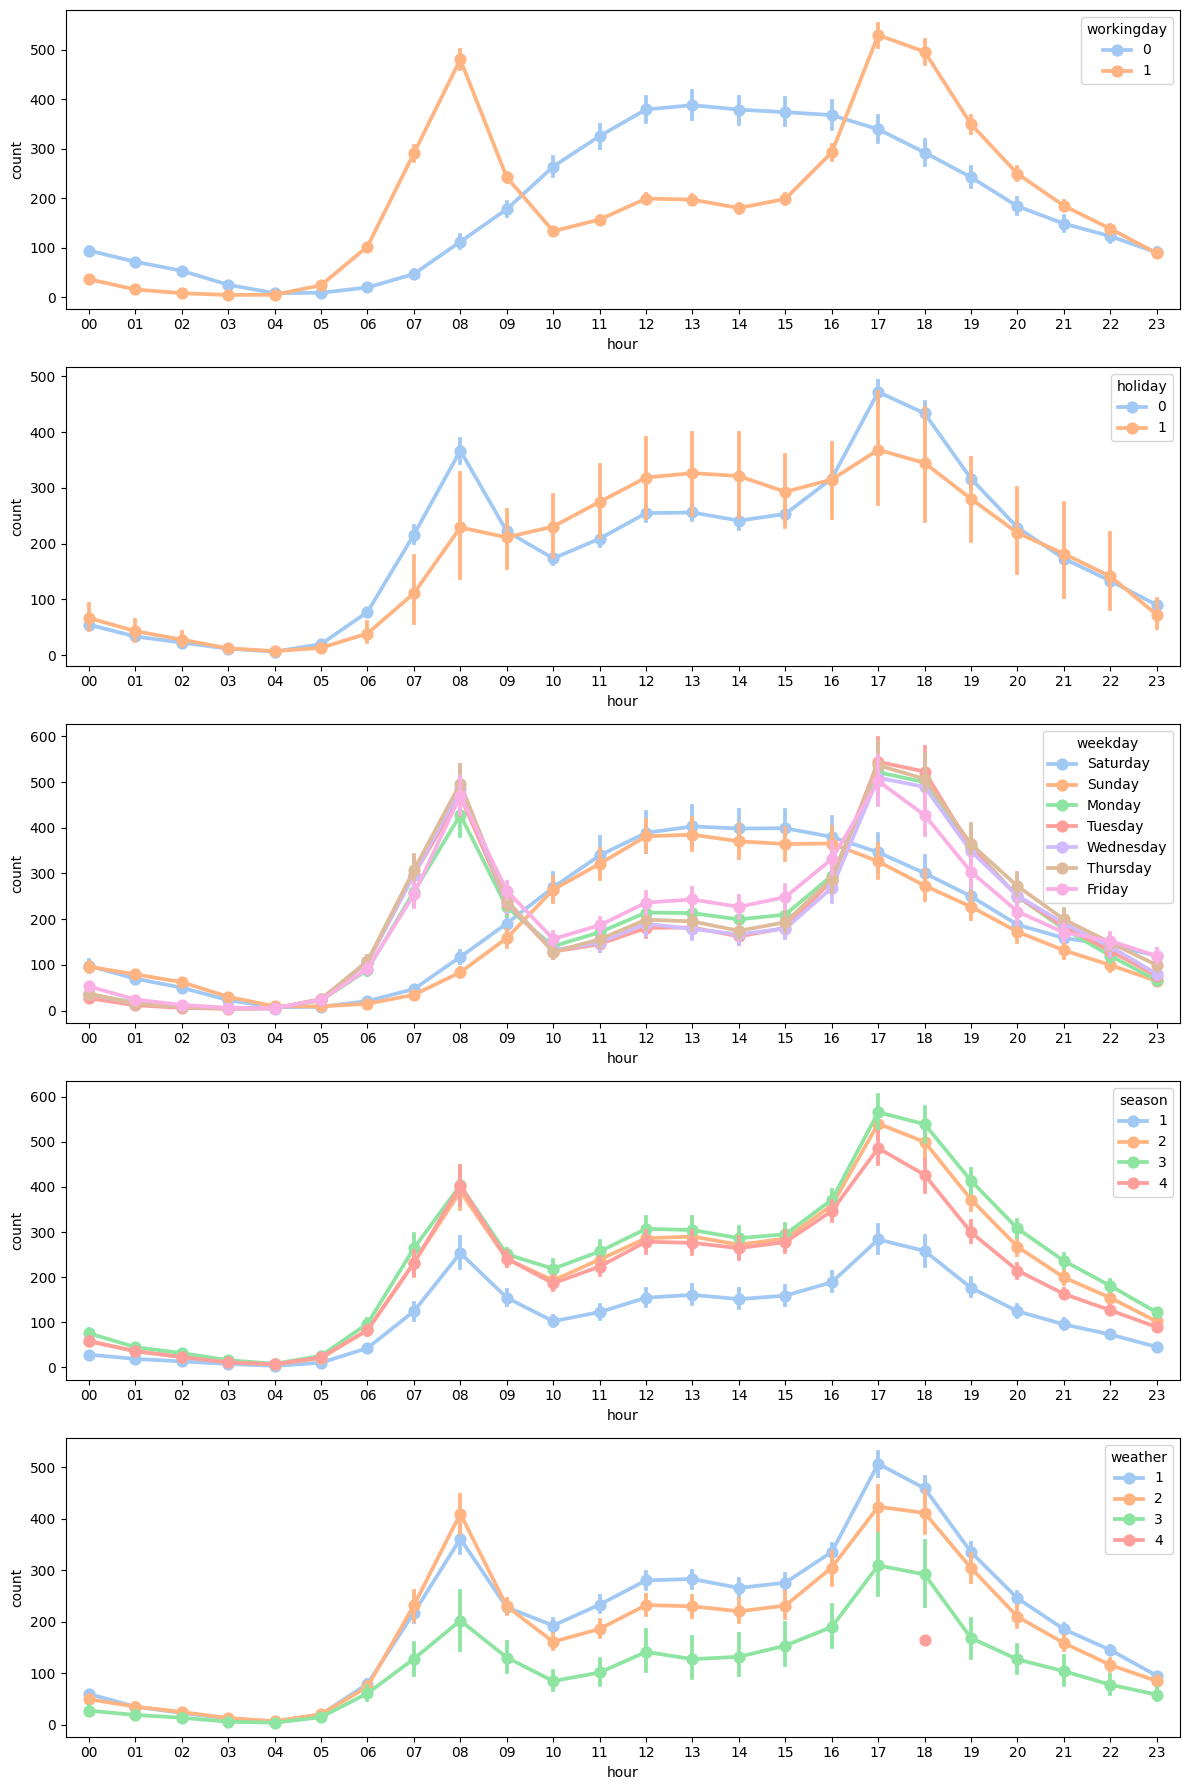

In [ ]:
figure, axes = plt.subplots(nrows=5, ncols=1,figsize=(12,18))
palette = sns.color_palette("pastel")

sns.pointplot(x='hour', y='count', data = train, hue='workingday',ax=axes[0], palette = palette)
sns.pointplot(x='hour', y='count', data = train, hue='holiday',ax=axes[1], palette = palette)
sns.pointplot(x='hour', y='count', data = train, hue='weekday',ax=axes[2], palette = palette)
sns.pointplot(x='hour', y='count', data = train, hue='season',ax=axes[3], palette = palette)
sns.pointplot(x='hour', y='count', data = train, hue='weather',ax=axes[4], palette = palette)

plt.tight_layout()
plt.show()

회귀선 포함 산점도 그래프

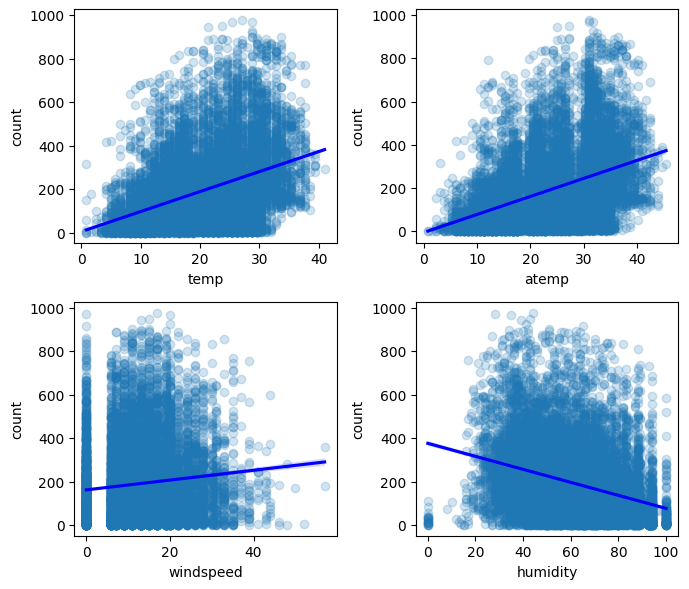

In [ ]:
figure, axes = plt.subplots(nrows=2, ncols=2,figsize=(7,6))
palette = sns.color_palette("pastel")

sns.regplot(x='temp', y='count', data = train, ax=axes[0,0],
            scatter_kws= {'alpha': 0.2}, line_kws={'color' : 'blue'})
sns.regplot(x='atemp', y='count', data = train, ax=axes[0,1],
            scatter_kws= {'alpha': 0.2}, line_kws={'color' : 'blue'})
sns.regplot(x='windspeed', y='count', data = train, ax=axes[1,0],
            scatter_kws= {'alpha': 0.2}, line_kws={'color' : 'blue'})
sns.regplot(x='humidity', y='count', data = train, ax=axes[1,1],
            scatter_kws= {'alpha': 0.2}, line_kws={'color' : 'blue'})

plt.tight_layout()
plt.show()

히트맵

<Axes: >

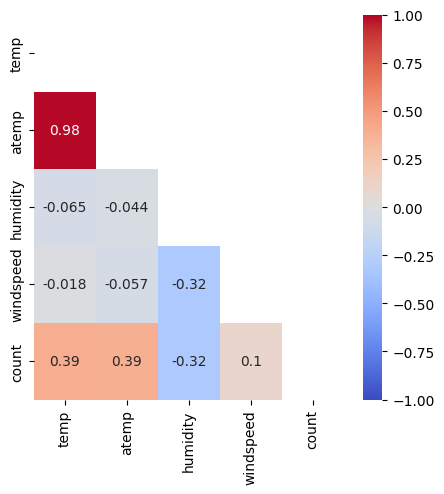

In [ ]:
mask = np.triu(np.ones_like(train[['temp', 'atemp', 'humidity', 'windspeed', 'count']].corr(), dtype=bool))

plt.figure(figsize=(5,5))

sns.heatmap(train[['temp', 'atemp', 'humidity', 'windspeed', 'count']].corr(),
             mask = mask,
            annot = True,
            cmap = 'coolwarm',
            vmin = -1, vmax = 1)

# 2. 데이터 전처리


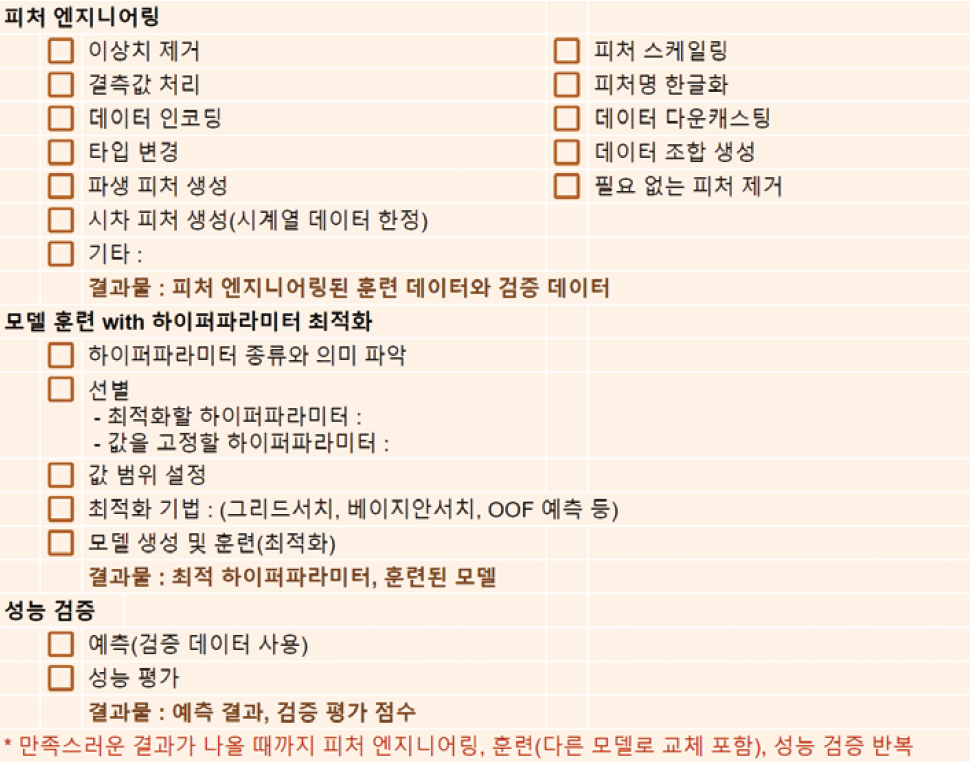

### 데이터 클리닝(불필요한 피처 제거)

In [ ]:
train = train[train['weather'] != 4]

In [ ]:
train['year'] = train['year'].astype(int)
train['day'] = train['day'].astype(int)
train['hour'] = train['hour'].astype(int)

<ipython-input-28-e3ae3f3fabd5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['year'] = train['year'].astype(int)
<ipython-input-28-e3ae3f3fabd5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['day'] = train['day'].astype(int)
<ipython-input-28-e3ae3f3fabd5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

### 데이터셋 나누기

In [ ]:
from sklearn.model_selection import train_test_split    # 데이터셋 나누는 라이브러리

X = train.drop(['count', 'casual', 'registered', 'datetime', 'date', 'month', 'windspeed','weekday'],axis=1)
y = np.log(train['count']) # 종속변수

X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, shuffle=True)

# 3. 데이터 모델링

In [ ]:
# !pip install scikit-optimize
# !pip install catboost
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression, LinearRegression
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.7/107.7 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 8.4 MB/s eta 0:00:00


In [ ]:
search_spaces = {
    'LightGBM': {'model': lgb.LGBMRegressor(verbose=-1),
                 'params': {'learning_rate': Real(0.01, 1.0, 'log-uniform'),
                            'n_estimators': Integer(50, 300),
                            'max_depth': Integer(1, 50),
                            'num_leaves': Integer(2, 128),
                            'min_child_samples': Integer(1, 100),
                            'subsample': Real(0.5, 1.0),
                            'colsample_bytree': Real(0.5, 1.0)}},

    'CATboost': {'model': CatBoostRegressor(verbose=False),
                 'params': {'learning_rate': Real(0.01, 1.0, 'log-uniform'),
                            'depth': Integer(4, 10),
                            'l2_leaf_reg': Real(1, 10),
                            'iterations': Integer(100, 1000),
                            'border_count': Integer(32, 255)}},

    'XGBoost': {'model': xgb.XGBRegressor(),
                'params': {'learning_rate': Real(0.01, 1.0, 'log-uniform'),
                           'n_estimators': Integer(50, 300),
                           'max_depth': Integer(1, 50),
                           'min_child_weight': Integer(1, 10),
                           'subsample': Real(0.5, 1.0),
                           'colsample_bytree': Real(0.5, 1.0)}},

    '랜덤포레스트 회귀': { 'model': RandomForestRegressor(),
                            'params': {'n_estimators': Integer(100, 500),
                                       'max_depth': Integer(1, 50),
                                       'min_samples_split': Real(0.01, 0.1)}},
    '선형 회귀': {'model': LinearRegression(),
                  'params': {}},

    # 'SVR': {'model': SVR(),
    #         'params': {'C': Real(1e-6, 1e+6, prior='log-uniform'),
    #                    'gamma': Real(1e-6, 1e+1, prior='log-uniform'),
    #                    'kernel': Categorical(['linear', 'poly', 'rbf', 'sigmoid'])}}
}

In [ ]:
best_models = {}
for model_name, config in search_spaces.items():
    optimizer = BayesSearchCV(
        estimator=config['model'],
        search_spaces=config['params'],
        n_iter=20,
        cv=5,
        n_jobs=-1,
        scoring='neg_mean_squared_error'  # 회귀 모델의 평가 기준
    )
    optimizer.fit(X, y)

    best_models[model_name] = optimizer.best_estimator_

    print(f'{model_name}')
    print(f'최적 파라미터: {optimizer.best_params_}')
    print(f'점수: {-optimizer.best_score_}')

LightGBM
최적 파라미터: OrderedDict([('colsample_bytree', 0.7568843497344815), ('learning_rate', 0.08050961086578631), ('max_depth', 49), ('min_child_samples', 50), ('n_estimators', 172), ('num_leaves', 71), ('subsample', 0.9597093176297942)])
점수: 0.2177473418641897
CATboost
최적 파라미터: OrderedDict([('border_count', 68), ('depth', 6), ('iterations', 1000), ('l2_leaf_reg', 1.0), ('learning_rate', 0.16610493959211767)])
점수: 0.23742748507125655


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


XGBoost
최적 파라미터: OrderedDict([('colsample_bytree', 0.8704375800945023), ('learning_rate', 0.03460592601476167), ('max_depth', 10), ('min_child_weight', 10), ('n_estimators', 259), ('subsample', 0.7837563200152344)])
점수: 0.22284498527463525
랜덤포레스트 회귀
최적 파라미터: OrderedDict([('max_depth', 44), ('min_samples_split', 0.01), ('n_estimators', 100)])
점수: 0.3647879357950504


ValueError: The search_spaces parameter should contain at least onenon-empty search space, got {}

 여기 까지 이전 셀 실행(필수)

### 모델 학습

In [ ]:
model = lgb.LGBMRegressor(verbose=-1,
                   colsample_bytree = 0.7568843497344815,
                   learning_rate = 0.08050961086578631,
                   max_depth = 49,
                   min_child_samples = 50,
                   n_estimators = 172,
                   num_leaves = 71,
                   subsample = 0.9597093176297942,
)

model.fit(X_train, y_train)  # 모델 학습

LGBMRegressor(colsample_bytree=0.7568843497344815,
              learning_rate=0.08050961086578631, max_depth=49,
              min_child_samples=50, n_estimators=172, num_leaves=71,
              subsample=0.9597093176297942, verbose=-1)

### 모델 예측

In [ ]:
 preds = model.predict(X_val)

# 5. 모델 평가

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_squared_log_error
# 회귀 평가 지표
mae = mean_absolute_error(y_val, preds)
mse = mean_squared_error(y_val, preds)
r2 = r2_score(y_val, preds)

# RMSLE 계산 (음수 값 처리)
y_val_transformed = y_val + 1
preds_transformed = preds + 1
RMSLE = np.sqrt(mean_squared_log_error(y_val_transformed, preds_transformed))

print('MAE : ', mae)
print('MSE : ', mse)
print('R2 : ', r2)
print('RMSLE : ', RMSLE)

MAE :  0.2189481929631331
MSE :  0.10300872672232297
R2 :  0.9553971205243156
RMSLE :  0.07641209765111535


# 6. 최종 예측

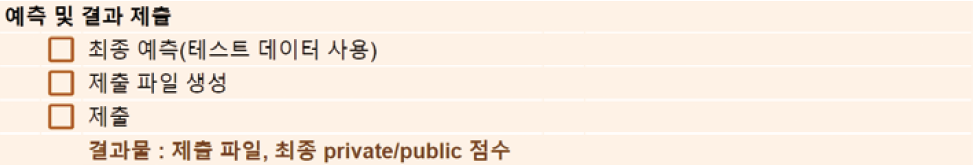

### 테스트 파일 로드 및 전처리

In [ ]:
# 날짜 피처 생성
test['date'] = test['datetime'].apply(lambda x : x.split()[0])

# 연도,월 , 일, 시간 차례로 추가
test['year'] = test['datetime'].apply(lambda x : x.split()[0].split('-')[0])
test['month'] = test['datetime'].apply(lambda x : x.split()[0].split('-')[1])
test['day'] = test['datetime'].apply(lambda x : x.split()[0].split('-')[2])
test['hour'] = test['datetime'].apply(lambda x : x.split()[1].split(':')[0])

test['weekday'] = test['date'].apply(lambda dateString: calendar.day_name[datetime.strptime(dateString, '%Y-%m-%d').weekday()])

test['year'] = test['year'].astype(int)
test['day'] = test['day'].astype(int)
test['hour'] = test['hour'].astype(int)

test = test.drop(['datetime', 'date', 'month', 'windspeed','weekday'],axis=1)

In [ ]:
test.shape

(6493, 10)

### 모델 추론

In [ ]:
preds = model.predict(test)

### 제출 파일 만들기

In [ ]:
import numpy as np

submission["count"] = np.exp(preds).astype(int)

# 결과 확인
submission.head()

,datetime,count
0,2011-01-20 00:00:00,11
1,2011-01-20 01:00:00,5
2,2011-01-20 02:00:00,3
3,2011-01-20 03:00:00,2
4,2011-01-20 04:00:00,2


In [ ]:
submission.to_csv("Complite.csv", index=False)